In [4]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps




## Load the dataset

In [5]:
data = pd.read_csv('adult_with_headers.csv')

## Basic Data Exploration

In [6]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Scaling techniques

### Standard Scaling

In [10]:
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data.select_dtypes(include=[np.number]))
data_standard_scaled

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

### Min-Max Scaling

In [13]:
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data.select_dtypes(include=[np.number]))
data_minmax_scaled


array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

Discussion on Scaling Techniques:

Standard Scaling is preferred when the data follows a normal distribution.

Min-Max Scaling is preferred when we want to normalize the data within a specific range [0, 1]

### Encoding Techniques

One-Hot Encoding

In [22]:
data_ohe = pd.get_dummies(data, columns=[col for col in data.select_dtypes(include=[object]).columns if data[col].nunique() < 5])
data_ohe.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0


Label Encoding

In [18]:
le = LabelEncoder()
for col in data.select_dtypes(include=[object]).columns:
    if data[col].nunique() >= 5:
        data[col] = le.fit_transform(data[col])
data.head()
data.shape

(32561, 15)

Discussion on Encoding Techniques:

One-Hot Encoding is useful as it does not assume any ordinal relationship between categories

However, it can lead to a high-dimensional feature space if the number of categories is large

Label Encoding is memory efficient but assumes an ordinal relationship which might not always be true.


### Feature Engineering

Creating a new feature

---



In [23]:
data['age_bucket'] = pd.cut(data['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bucket
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K,middle-aged
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K,middle-aged
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K,middle-aged
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K,senior
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K,young


Creating a new feature

---


In [26]:
data['education_occupation'] = data['education'].astype(str) + "_" + data['occupation'].astype(str)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bucket,education_occupation
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K,middle-aged,9_1
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K,middle-aged,9_4
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K,middle-aged,11_6
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K,senior,1_6
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K,young,9_10


### Transformation of skewed features

In [30]:
#  Log transformation of a skewed feature
data['capital_gain_log'] = np.log1p(data['capital_gain'])
data['capital_gain_log']


0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain_log, Length: 32561, dtype: float64

### Feature Selection

Identifying outliers using Isolation Forest

In [ ]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(data.select_dtypes(include=[np.number]))
data = data[outliers == 1]


Outliers can skew the model parameters and lead to overfitting or underfitting




---



Predictive Power Score (PPS)

In [ ]:
pps_matrix = pps.matrix(data)


Plotting the correlation matrix

<ipython-input-38-10d7bda73941>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


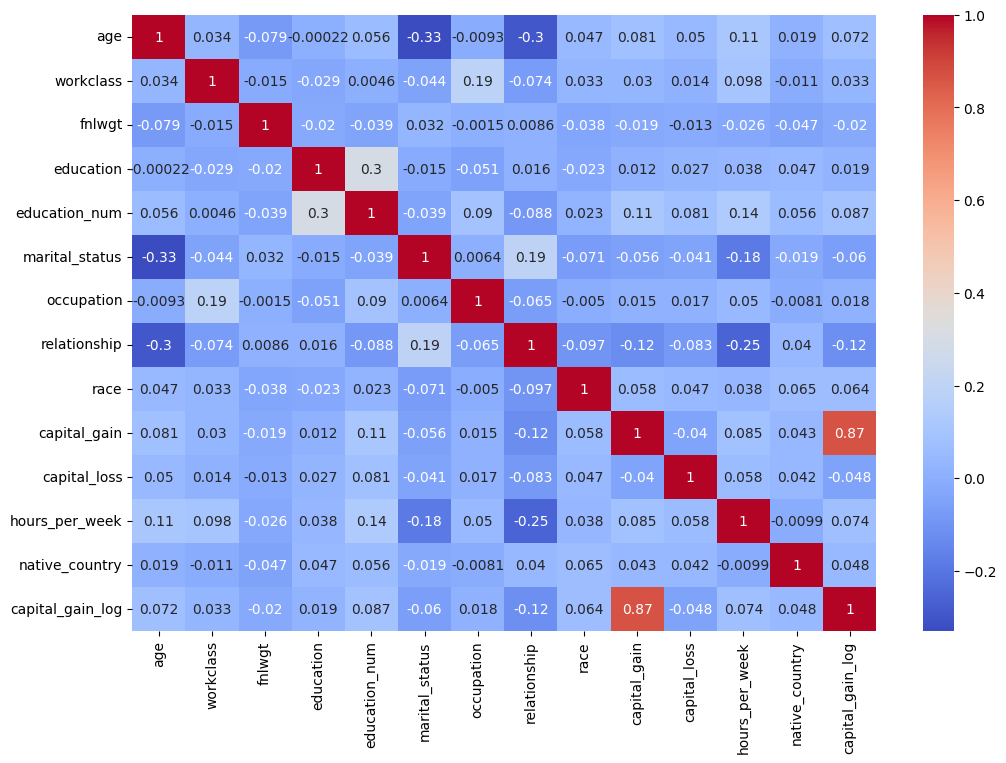

In [38]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

PPS is useful for detecting non-linear relationships, while the correlation matrix is limited to linear relationships
